In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("../../Data/crop_recommendation.csv")
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [87]:
def plot_histogram(nutrient,data,measurement="kg/ha"):
    plt.xlabel(f"{nutrient} Ratio {measurement}")
    plt.ylabel(f"Number of Data Points")
    plt.title(f"{nutrient} Histogram")
    plt.hist(data)
    plt.savefig(f"output/plots/{nutrient}Histogram.png")
    plt.show()

def plot_crop_vs_nutrient(nutrient,column,measurement="kg/ha"):
    plt.figure(figsize=(10, 6))
    for crop, group in data.groupby('label'):
        plt.scatter(group[column], group['label'], label=crop)

        # Set labels and title
    plt.xlabel(f'{nutrient} Values measurement')
    plt.ylabel('Crop')
    plt.title(f'{nutrient} Values vs Crop')
    plt.legend()
    plt.savefig(f"output/plots/{nutrient}ValuesvsCropscatter.png")

    # Show plot
    plt.show()

labels = data["label"].unique()
def plot_x_vs_label(feature,nutrient,measurement="kg/ha"):
    labels_cat = []
    for label in labels:
        labels_cat.append(data[data["label"]==label][feature])
    fig = plt.figure(figsize=(25,6))
    plt.title(f"{nutrient} vs crops")
    plt.ylabel(f"{measurement}")
    plt.xticks([i for i in range(1,len(data["label"].unique())+1)],data["label"].unique())
    plt.violinplot(labels_cat)
    plt.savefig(f"output/plots/{nutrient}ValuesvsCropviolin.png")

    # Show plot
    plt.show()
    

In [88]:
len(data.label.unique())

22

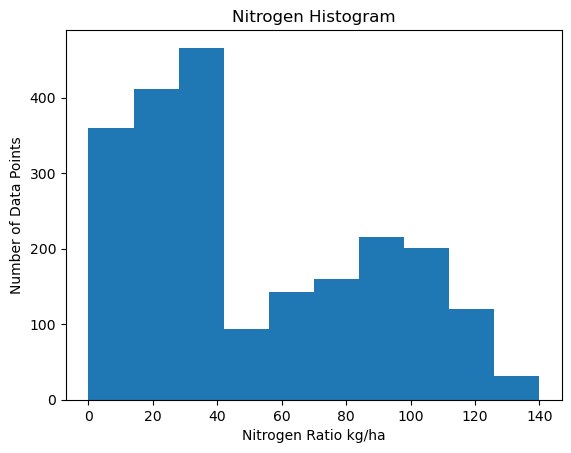

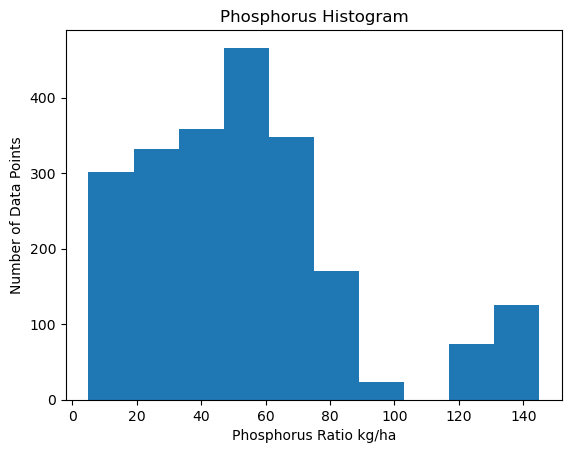

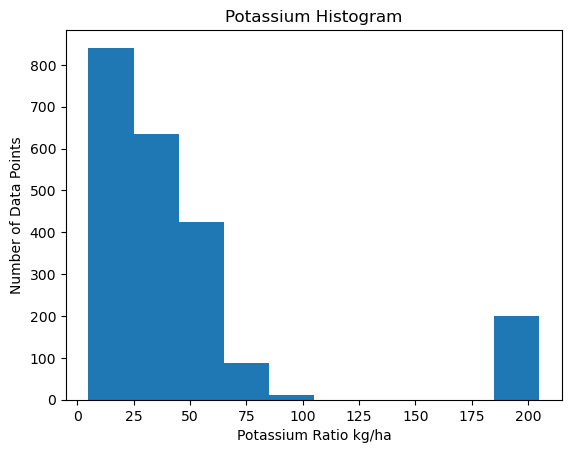

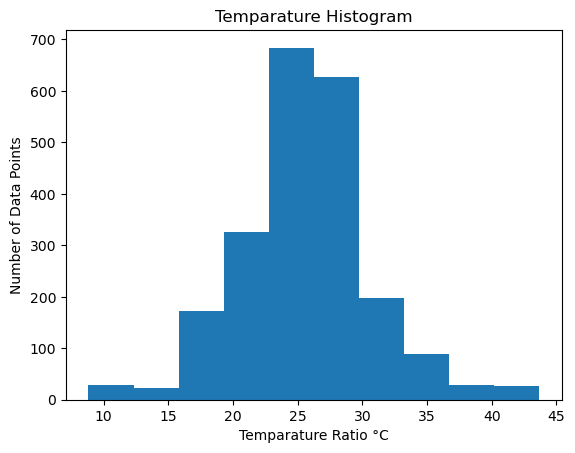

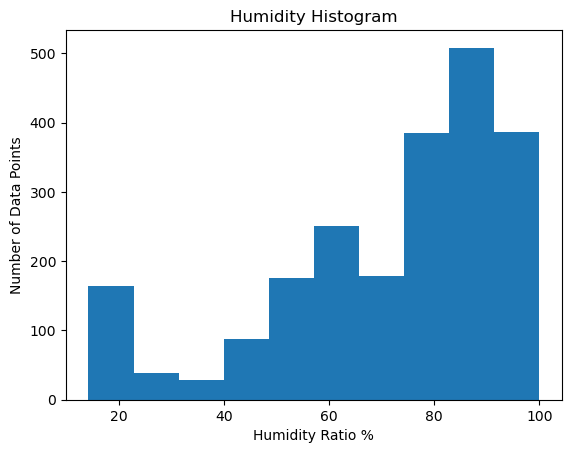

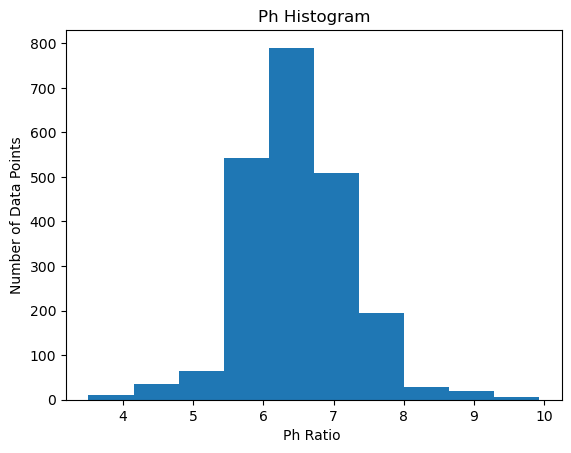

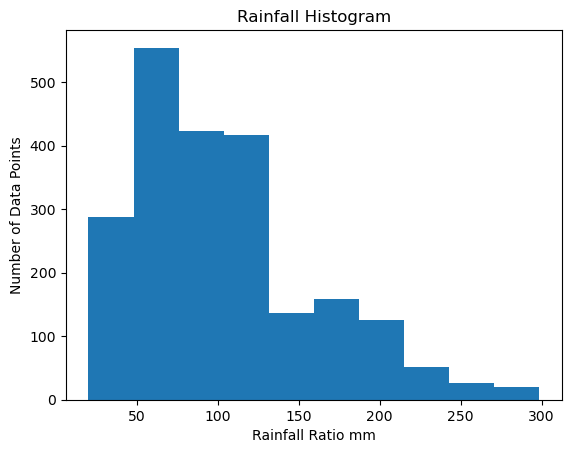

In [89]:
plot_histogram("Nitrogen",data["N"])
plot_histogram("Phosphorus",data["P"])
plot_histogram("Potassium",data["K"])
plot_histogram("Temparature",data["temperature"],"°C")
plot_histogram("Humidity",data["humidity"],"%")
plot_histogram("Ph",data["ph"],"")
plot_histogram("Rainfall",data["rainfall"],"mm")


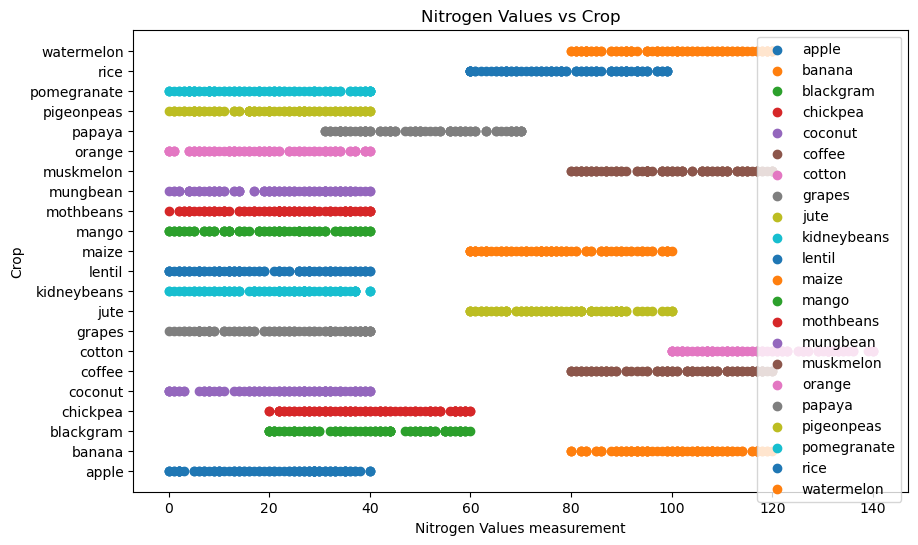

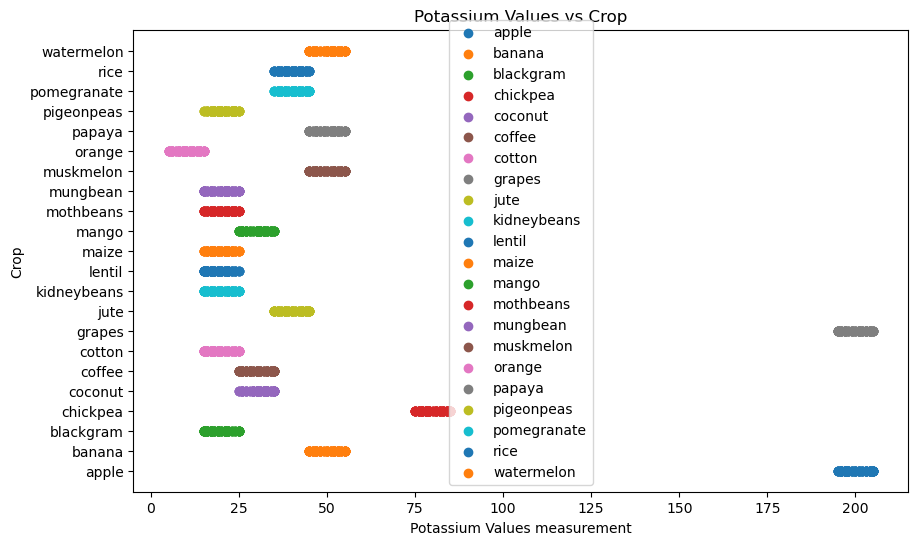

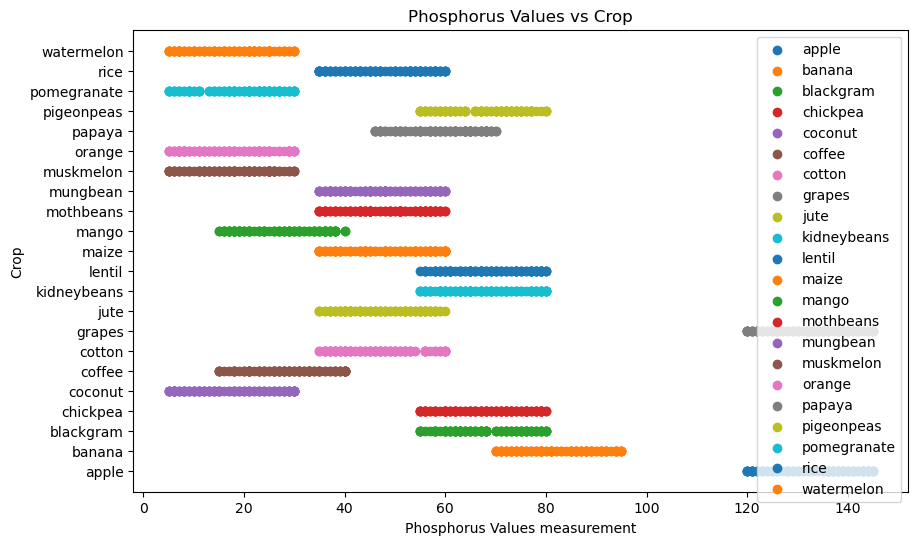

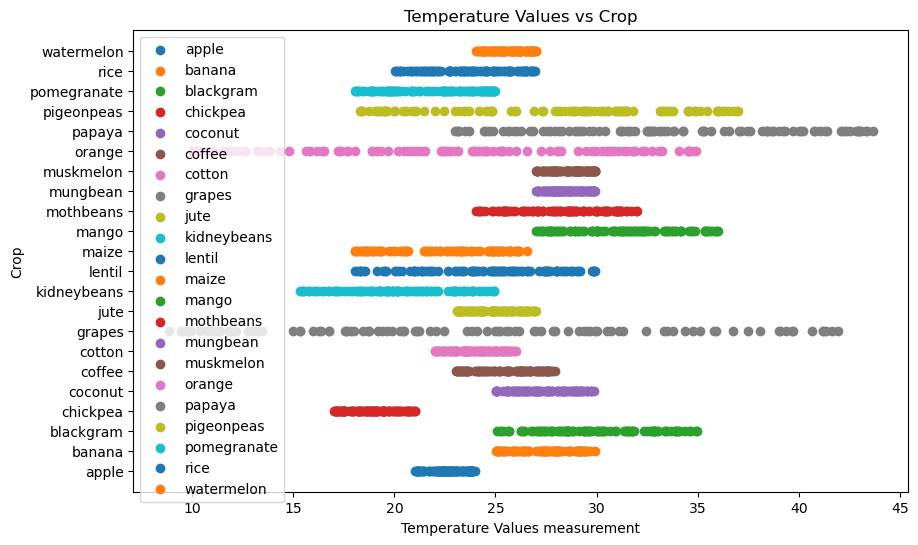

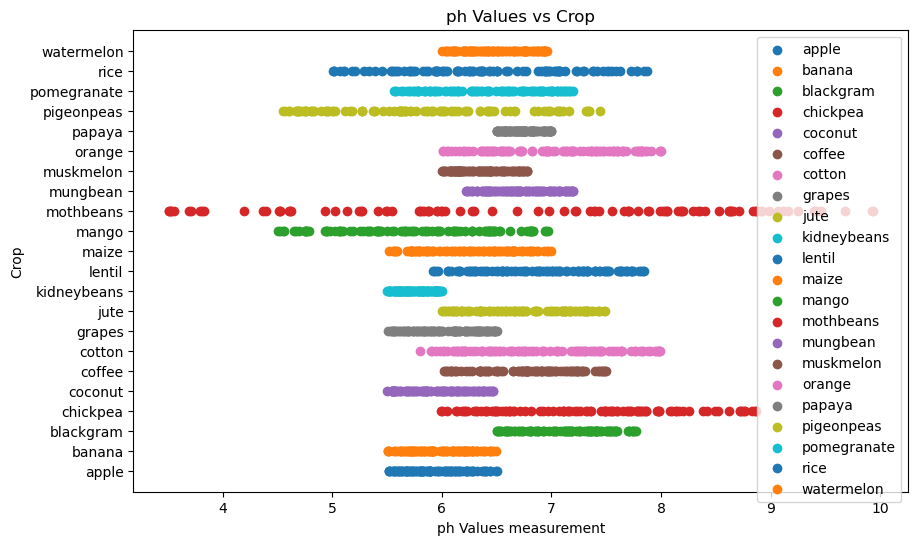

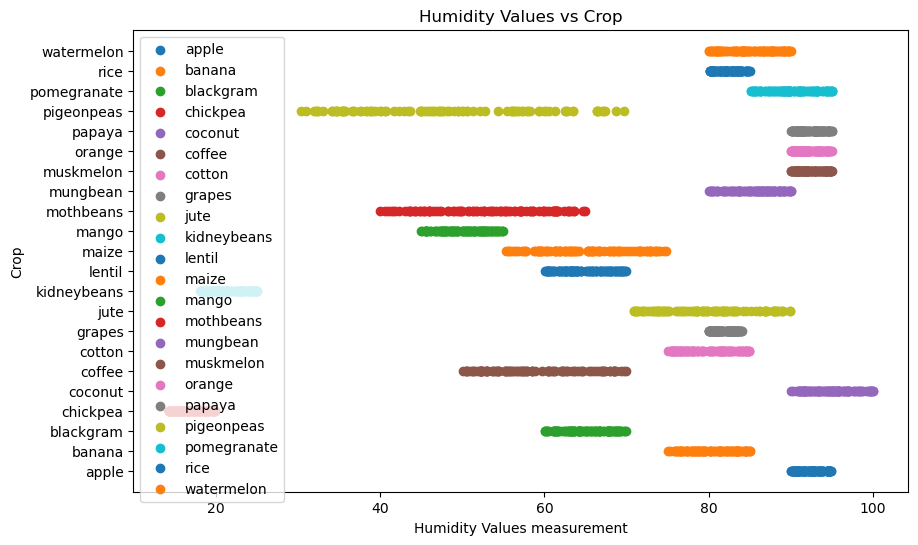

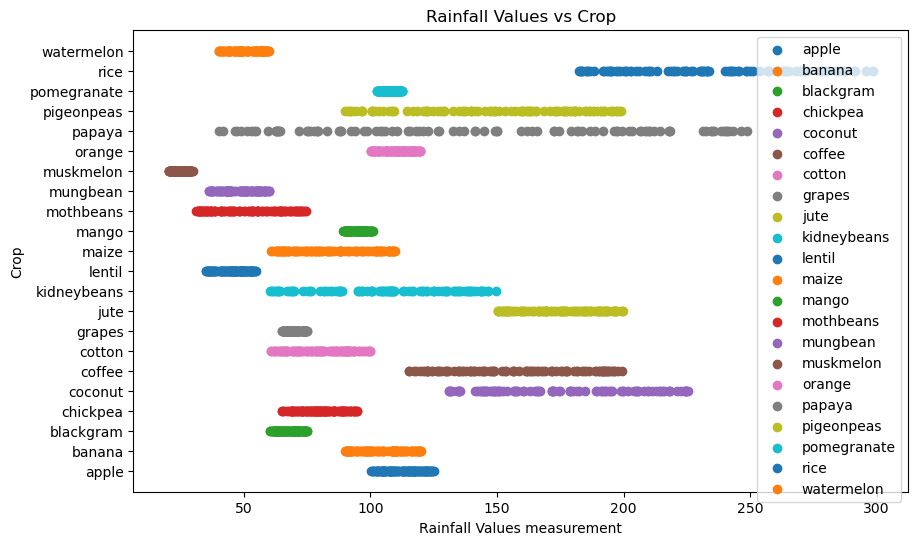

In [81]:
plot_crop_vs_nutrient("Nitrogen","N","kg/ha")
plot_crop_vs_nutrient("Potassium","K","kg/ha")
plot_crop_vs_nutrient("Phosphorus","P","kg/ha")
plot_crop_vs_nutrient("Temperature","temperature","°c")
plot_crop_vs_nutrient("ph","ph","")
plot_crop_vs_nutrient("Humidity","humidity","%")
plot_crop_vs_nutrient("Rainfall","rainfall","mm")

<AxesSubplot:>

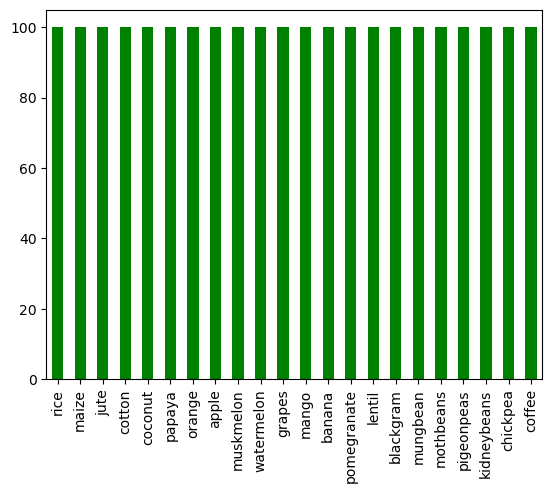

In [82]:
data['label'].value_counts().plot(kind='bar', color='green')

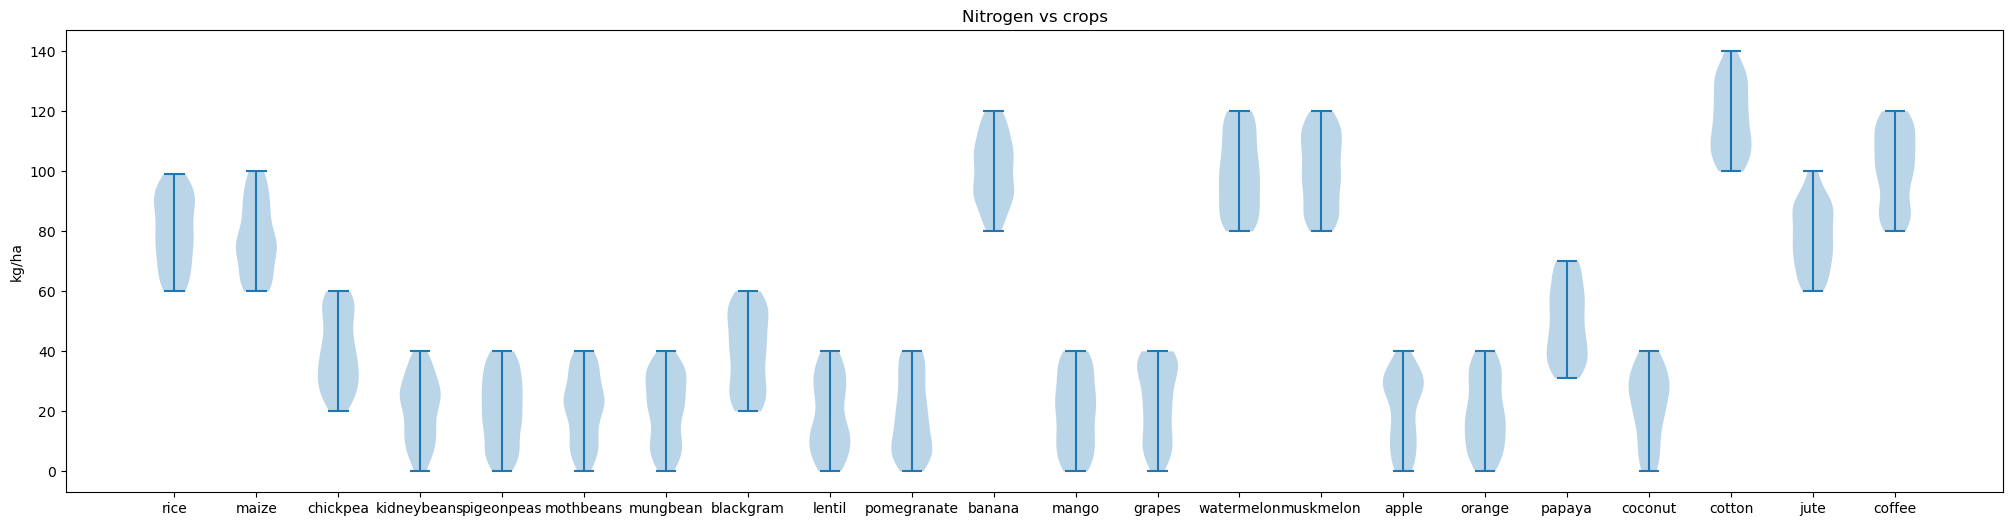

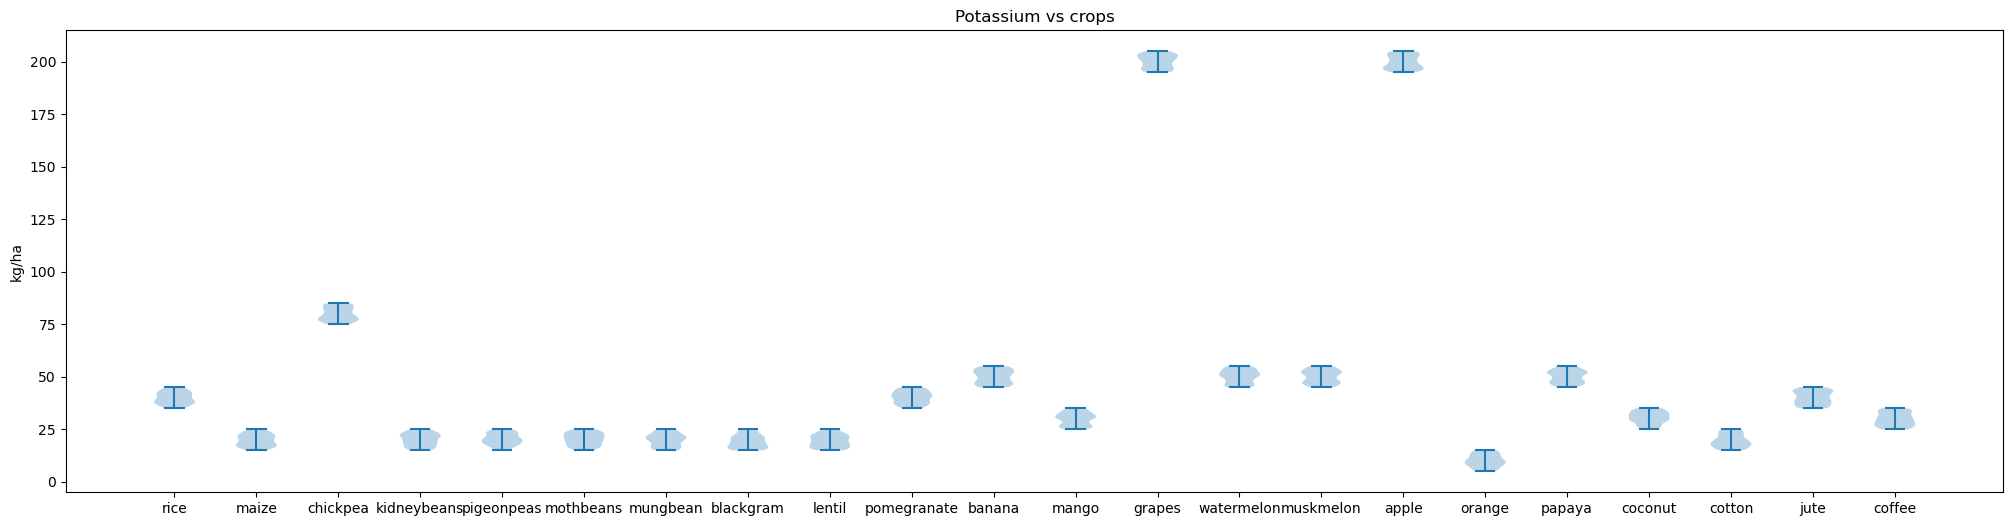

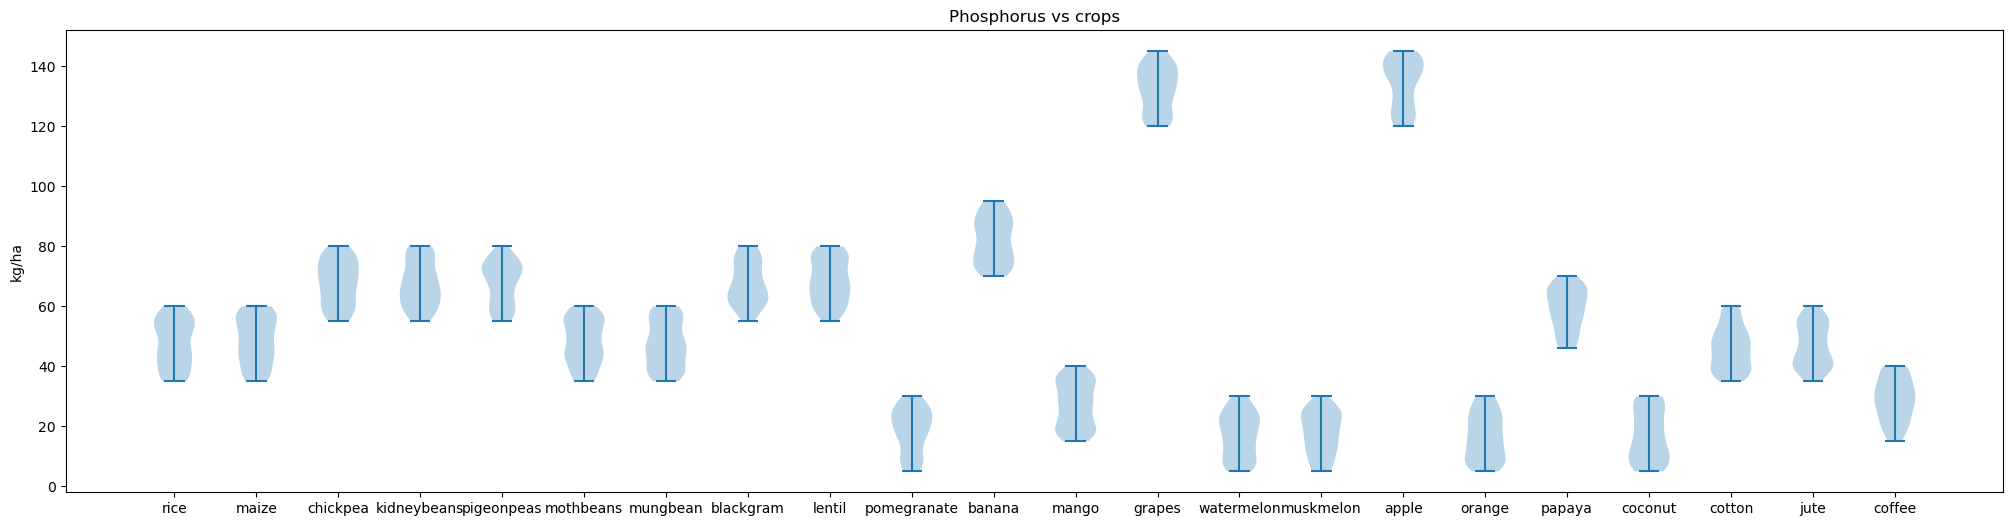

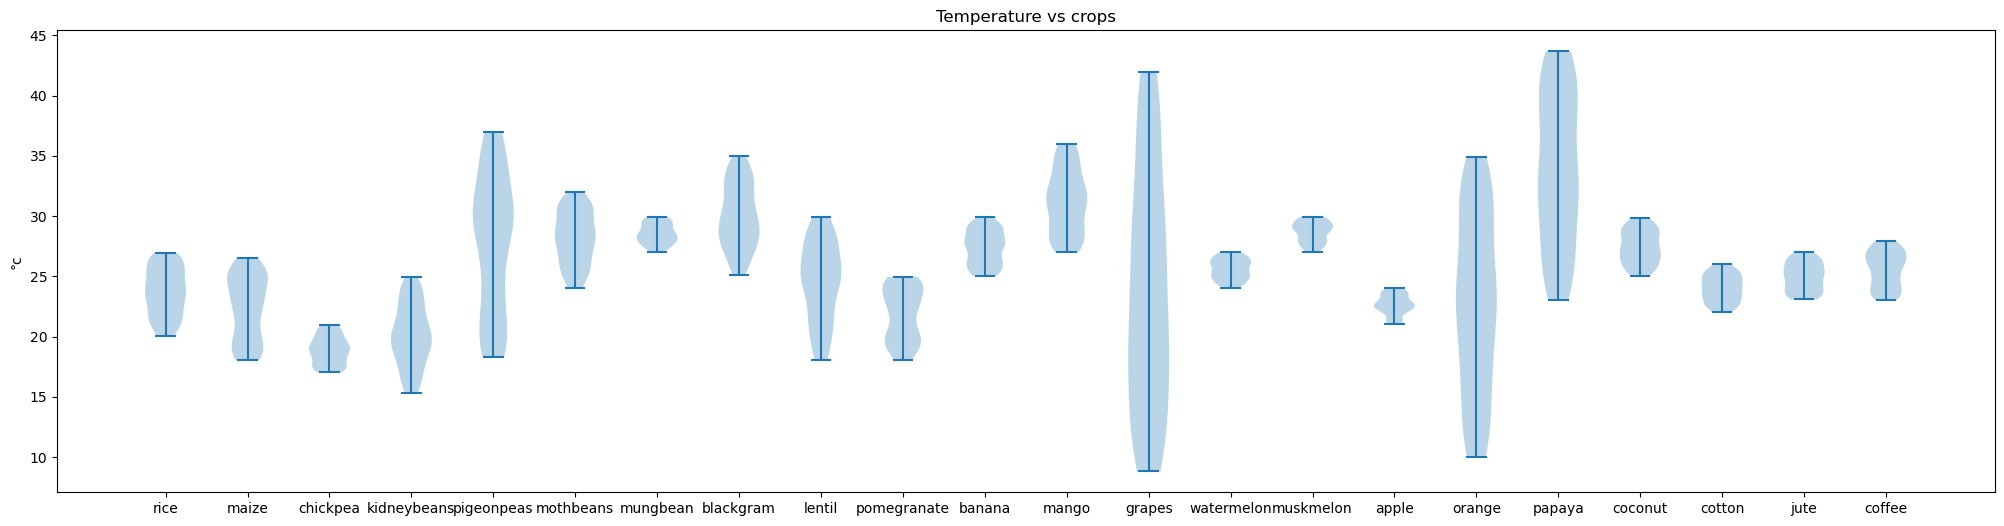

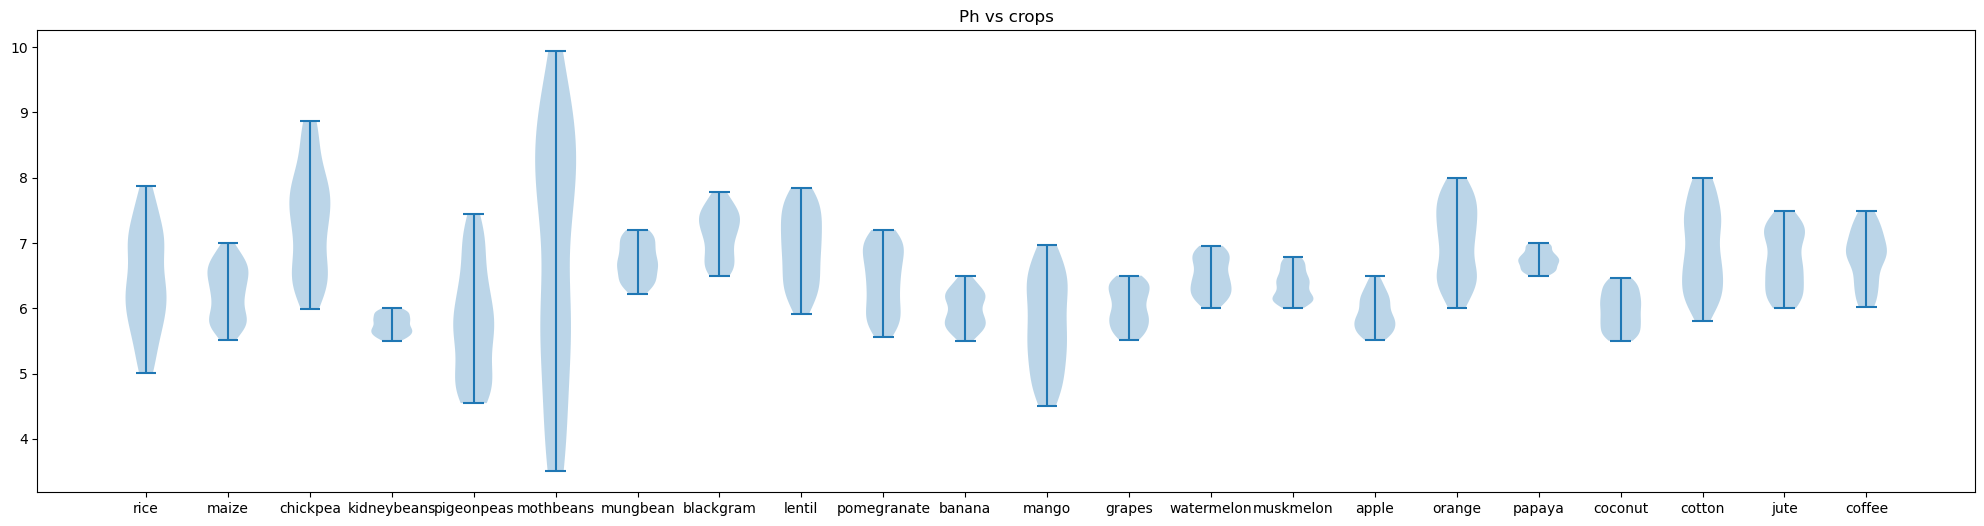

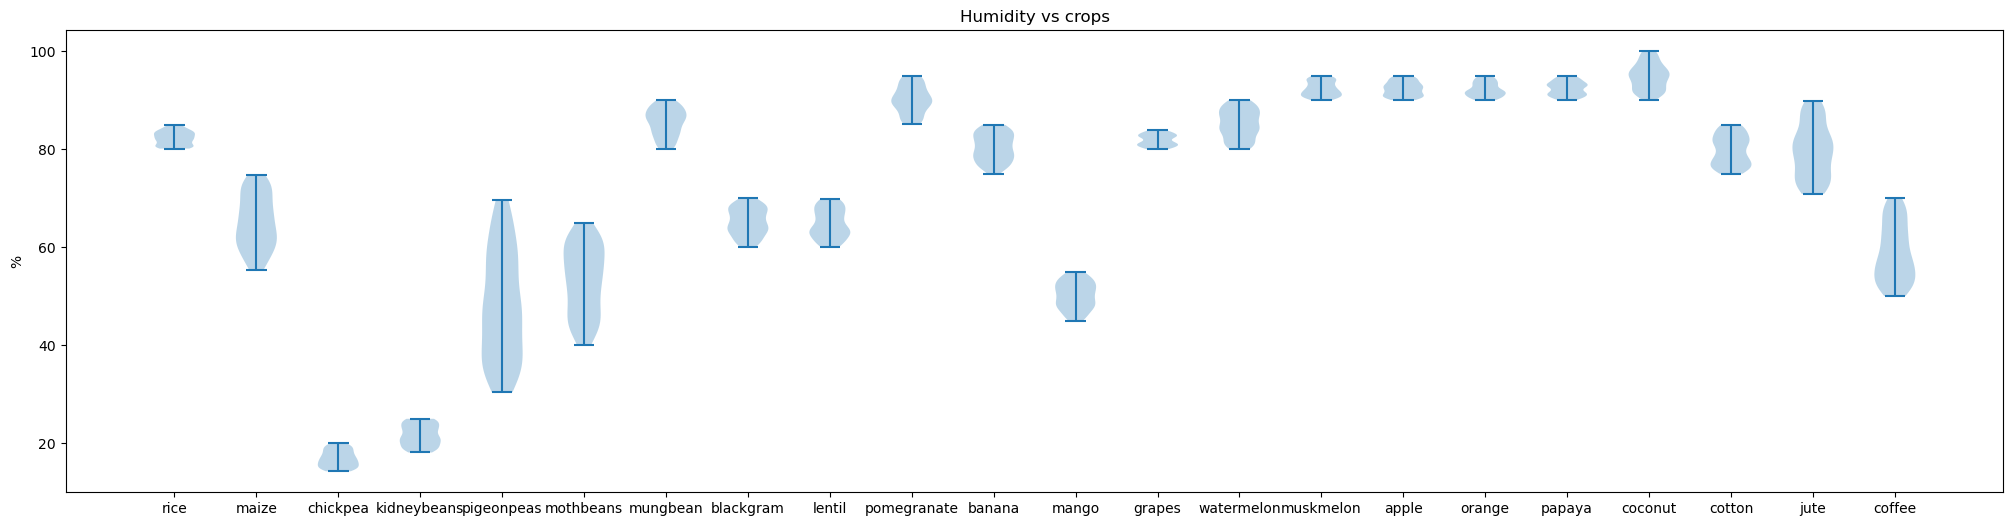

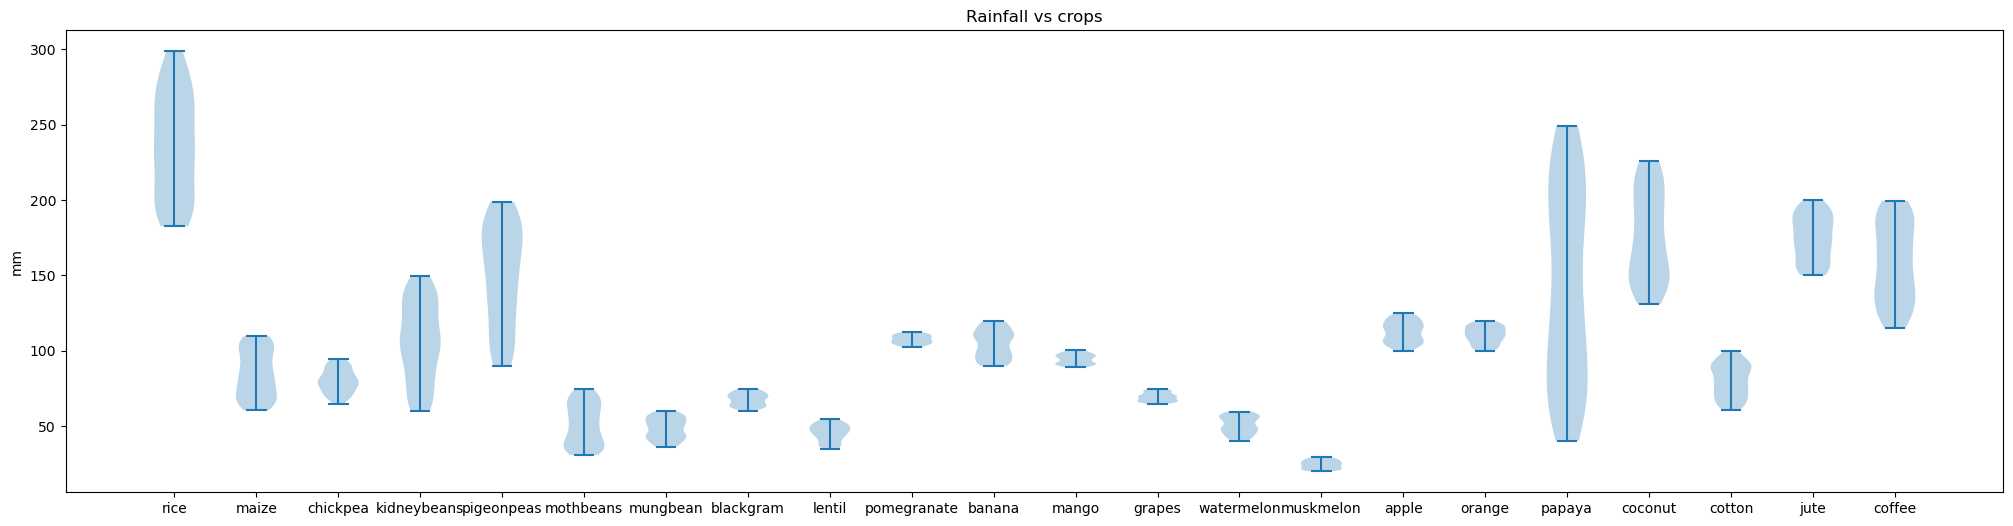

In [83]:
plot_x_vs_label("N","Nitrogen")
plot_x_vs_label("K","Potassium")
plot_x_vs_label("P","Phosphorus")
plot_x_vs_label("temperature","Temperature","°c")
plot_x_vs_label("ph","Ph","")
plot_x_vs_label("humidity","Humidity","%")
plot_x_vs_label("rainfall","Rainfall","mm")

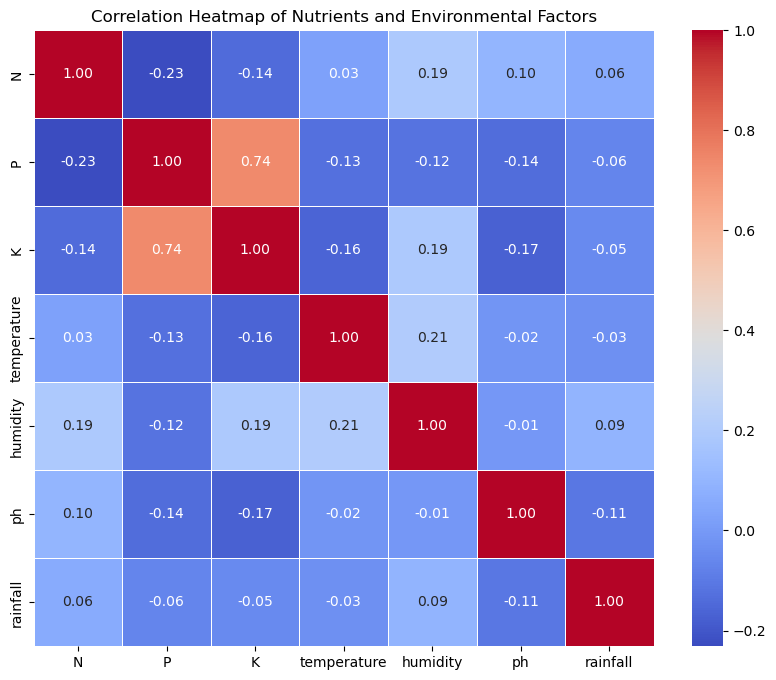

In [97]:
selected_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
correlation_matrix = data[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Nutrients and Environmental Factors')
plt.savefig(f"output/plots/HeatMap.png")


plt.show()